In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/Users/vedan/OneDrive/Documents/DS PROJECT/Ecommerce_Customers (2).csv")
df = pd.DataFrame(data)
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
#pre-processed data
file = pd.read_csv("C:/Users/vedan/OneDrive/Documents/DS PROJECT/Ecommerce_PRO_BUSI_REQ/customers_no_outliers.csv")

df1 = pd.DataFrame(file)
df1.head()

,Unnamed: 0,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,34.497268,12.655651,39.577668,4.082621,587.951054
1,1,31.926272,11.109461,37.268959,2.664034,392.204933
2,2,33.000915,11.330278,37.110597,4.104543,487.547505
3,3,34.305557,13.717514,36.721283,3.120179,581.852344
4,4,33.330673,12.795189,37.536653,4.446308,599.406092


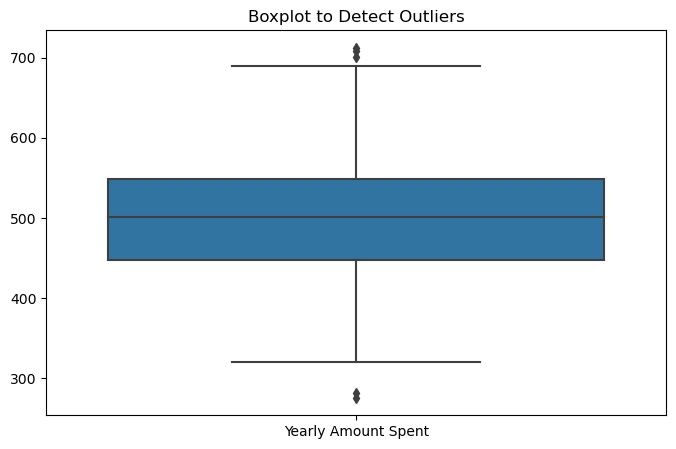

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1[['Yearly Amount Spent']])
plt.title('Boxplot to Detect Outliers')
plt.show()

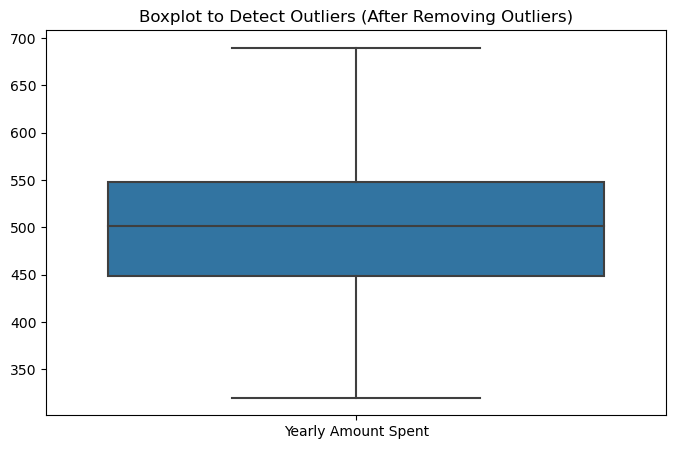

In [5]:
Q1 = df1['Yearly Amount Spent'].quantile(0.25)
Q3 = df1['Yearly Amount Spent'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for filtering outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df1 = df1[(df1['Yearly Amount Spent'] >= lower_bound) & (df1['Yearly Amount Spent'] <= upper_bound)]



plt.figure(figsize=(8, 5))
sns.boxplot(data=df1[['Yearly Amount Spent']])
plt.title('Boxplot to Detect Outliers (After Removing Outliers)')
plt.show()

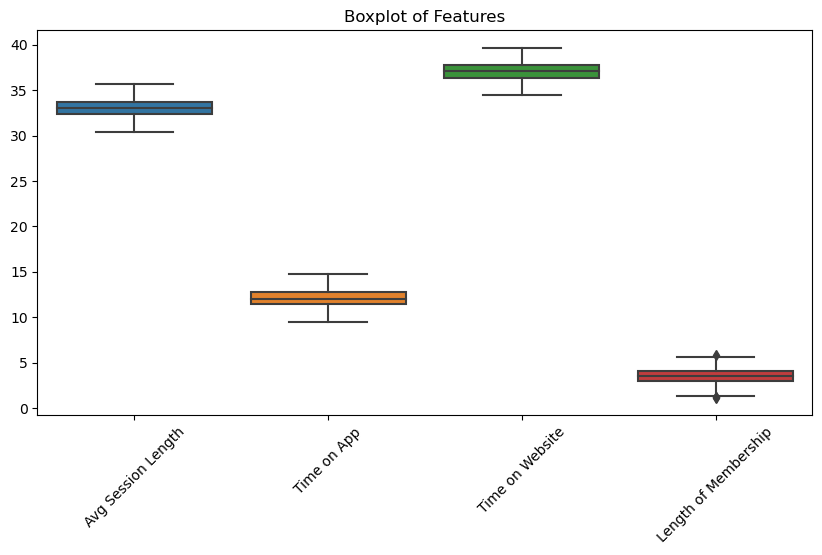

In [6]:
#boxplot

#separate Feature(X) and Target variable(y):
X = df1.drop(['Yearly Amount Spent','Unnamed: 0'],axis = 1)
y = df1['Yearly Amount Spent']

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
sns.boxplot(data=X,orient="v")
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

# clean data with no outliers

In [7]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Create standardscaler object
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,1.551065,0.615138,2.521137,0.604340
1,-1.176779,-1.004266,0.200916,-0.982694
2,-0.036575,-0.772993,0.041765,0.628866
3,1.347659,1.727280,-0.349490,-0.472386
4,0.313300,0.761282,0.469946,1.011213


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] =  X.columns
vif["VIF Factor"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print(vif)

               features  VIF Factor
0    Avg Session Length    1.001724
1           Time on App    1.008978
2       Time on Website    1.006303
3  Length of Membership    1.005664


# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lm.predict(X_test)
y_pred

array([482.38007257, 531.47776374, 440.86493478, 498.50963808,
       383.69946946, 517.27166125, 336.93289817, 567.51317801,
       498.18904719, 554.16931175, 620.1846192 , 448.23334298,
       584.41810481, 472.63432853, 483.46655741, 491.24615596,
       611.40157857, 549.54159902, 478.23755983, 446.9949076 ,
       468.39915502, 595.30753043, 520.27249025, 513.51322165,
       493.20684403, 578.41179611, 542.18699792, 478.41900153,
       500.07129789, 434.70886053, 457.44048415, 580.33262456,
       479.32162643, 526.40288407, 458.3299067 , 596.92765447,
       513.77253419, 455.22986867, 449.82887481, 511.69720203,
       451.43037762, 572.97348791, 456.02396619, 481.47316324,
       673.41792707, 434.46534017, 530.05158235, 397.17620096,
       410.77854149, 495.49146182, 502.55543535, 547.53168111,
       508.58755958, 487.39012877, 534.67542569, 443.62152117,
       548.57479166, 511.14996499, 498.41722149, 513.35394336,
       472.35562597, 576.41216884, 540.78645913, 515.64

In [11]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'Mean Square Error      : {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared              : {r2}')

Mean Square Error      : 93.0952264280345
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.9753581726631632


# Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
la = Lasso(alpha = 0.1)
la.fit(X_train, y_train)

Lasso(alpha=0.1)

In [13]:
la_pred = la.predict(X_test)
la_pred

array([482.38912089, 531.45266329, 441.05535419, 498.44988071,
       384.06091528, 517.01227603, 337.28372561, 567.62015692,
       498.17712802, 553.86219456, 619.83178619, 448.60303017,
       584.04226913, 472.52985976, 483.61915009, 491.33234429,
       611.36822808, 549.20242529, 478.34553389, 447.28376794,
       468.46728305, 594.7111053 , 520.26707422, 513.45024054,
       493.17239974, 578.39826525, 542.03896406, 478.56507356,
       500.21215292, 434.83163858, 457.5362421 , 580.19681331,
       479.29449836, 526.41829818, 458.4136572 , 596.65736157,
       513.96352566, 455.5779511 , 449.77249993, 511.67517577,
       451.76608482, 572.97245037, 455.97996667, 481.56075569,
       672.73872825, 434.63064075, 529.93046172, 397.54429549,
       411.07324882, 495.28095627, 502.36593078, 547.26966928,
       508.82847362, 487.44756145, 534.74966575, 443.74950149,
       548.38808336, 511.01452305, 498.41848948, 513.15349752,
       472.50060691, 576.25387332, 540.5780213 , 515.63

In [14]:
la_r2 = r2_score(y_test,la_pred)
la_mse = mean_squared_error(y_test,la_pred)
la_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {la_mse}')
print(f'Root Mean Squared Error: {la_rmse}')
print(f'R-squared              : {la_r2}')

Mean Square Error      : 92.38946285870824
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.9755449846478723


# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

ri = Ridge(alpha = 0.1)
ri.fit(X_train, y_train)
ri_pred = ri.predict(X_test)

In [16]:
ri_r2 = r2_score(y_test,ri_pred)
ri_mse = mean_squared_error(y_test,ri_pred)
ri_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {ri_mse}')
print(f'Root Mean Squared Error: {ri_rmse}')
print(f'R-squared              : {ri_r2}')

Mean Square Error      : 93.0223351626424
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.97537746660599


# Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [18]:
dtr_r2 = r2_score(y_test,dtr_pred)
dtr_mse = mean_squared_error(y_test,dtr_pred)
dtr_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {dtr_mse}')
print(f'Root Mean Squared Error: {dtr_rmse}')
print(f'R-squared              : {dtr_r2}')

Mean Square Error      : 621.405196429127
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.8355172424607955


# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state = 42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [21]:
rfr_r2 = r2_score(y_test,rfr_pred)
rfr_mse = mean_squared_error(y_test,rfr_pred)
rfr_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {rfr_mse}')
print(f'Root Mean Squared Error: {rfr_rmse}')
print(f'R-squared              : {rfr_r2}')

Mean Square Error      : 229.72891777116578
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.939191937726565


# Gradient Boosting Regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [24]:
gbr_r2 = r2_score(y_test,gbr_pred)
gbr_mse = mean_squared_error(y_test,gbr_pred)
gbr_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {gbr_mse}')
print(f'Root Mean Squared Error: {gbr_rmse}')
print(f'R-squared              : {gbr_r2}')

Mean Square Error      : 182.8403331829848
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.9516031047629736


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_pf_train = pf.fit_transform(X_train)
X_pf_test = pf.transform(X_test)

In [32]:
pf_reg = LinearRegression()
pf_reg.fit(X_pf_train, y_train)

LinearRegression()

In [33]:
pf_pred = pf_reg.predict(X_pf_test)

In [34]:
pf_r2 = r2_score(y_test,pf_pred)
pf_mse = mean_squared_error(y_test,pf_pred)
pf_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {pf_mse}')
print(f'Root Mean Squared Error: {pf_rmse}')
print(f'R-squared              : {pf_r2}')

Mean Square Error      : 97.43175205466089
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.9742103166469828


# K-Nearest Neighbors Regressor (KNN)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)

In [38]:
knn_reg_r2 = r2_score(y_test,knn_reg_pred)
knn_reg_mse = mean_squared_error(y_test,knn_reg_pred)
knn_reg_rmse = np.sqrt(mse)

print(f'Mean Square Error      : {knn_reg_mse}')
print(f'Root Mean Squared Error: {knn_reg_rmse}')
print(f'R-squared              : {knn_reg_r2}')

Mean Square Error      : 368.2242497466855
Root Mean Squared Error: 9.648586758071593
R-squared              : 0.9025329360951887


In [39]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'Polynomial Regression': LinearRegression(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

In [41]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

# Displaying results
results

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
print(results_df)

D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                           Model       RMSE        R²
0              Linear Regression   9.648587  0.975358
1               Lasso Regression   9.490576  0.976159
2               Ridge Regression   9.612811  0.975541
3                  Random Forest  15.295198  0.938076
4              Gradient Boosting  13.498406  0.951771
5                 SVR Regression  61.168126  0.009634
6          Polynomial Regression   9.648587  0.975358
7  K-Nearest Neighbors Regressor  19.189170  0.902533


D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVR Regression': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors Regressor': {
        'n_neighbors': [3, 5, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Make sure the model names match
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=True)
    r2 = r2_score(y_test, predictions)
    
    tuned_results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'RMSE': rmse,
        'R²': r2
    }

# Displaying tuned results
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
tuned_results_df.reset_index(inplace=True)
tuned_results_df.rename(columns={'index': 'Model'}, inplace=True)
print(tuned_results_df)

D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\ANA\Lib\site-pack

                           Model  \
0              Linear Regression   
1               Lasso Regression   
2               Ridge Regression   
3                  Random Forest   
4              Gradient Boosting   
5                 SVR Regression   
6  K-Nearest Neighbors Regressor   

                                     Best Parameters        RMSE        R²  
0                                                 {}   93.095226  0.975358  
1                                    {'alpha': 0.01}   93.019679  0.975378  
2                                    {'alpha': 0.01}   93.087897  0.975360  
3  {'max_depth': 30, 'min_samples_split': 2, 'n_e...  225.835965  0.940222  
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  180.947970  0.952104  
5     {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}   95.256819  0.974786  
6  {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...  335.366070  0.911230  


D:\ANA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
import joblib

# saving model for deploymnent
joblib.dump(lm, 'linear_regression_model.pkl')

['linear_regression_model.pkl']